### **MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.**

### **MNIST is short for Modified National Institute of Standards and Technology database.It contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.The dataset is already divided into training and testing sets.**

## **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
from keras import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
%matplotlib inline

## **Kaggle json path**

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/'

## **API from kaggle**

In [3]:
!kaggle datasets download -d saijananim/ibm-mnist-dataset

 92% 14.0M/15.2M [00:00<00:00, 143MB/s]
100% 15.2M/15.2M [00:00<00:00, 149MB/s]


## **Unzipping the dataset**

In [4]:
!unzip \*.zip && rm *.zip

Archive:  ibm-mnist-dataset.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


## **Reading the dataset**

In [5]:
df=pd.read_csv('mnist_train.csv')

In [6]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Checking Null values**

In [7]:
df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [20]:
train = pd.read_csv('/content/mnist_train.csv')
test = pd.read_csv('/content/mnist_test.csv')

In [21]:
train.shape


(60000, 785)

In [22]:
test.shape

(10000, 785)

In [23]:
labels = train['label'].values

In [24]:
unique_value = np.array(labels)
np.unique(unique_value)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## **Data Analysis**

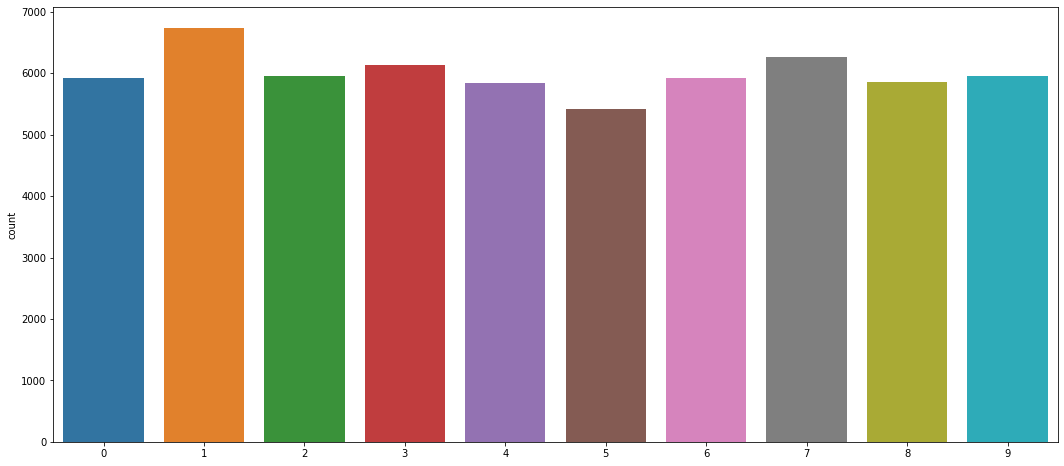

In [25]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [26]:
train.drop('label', axis = 1, inplace = True)

## **Reshaping the images**

In [27]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [28]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

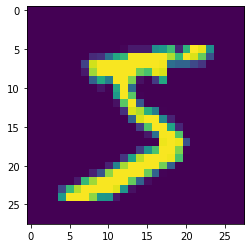

In [29]:
plt.imshow(images[0].reshape(28,28))

### **Spliting the dataset into train(80%) and test(20%)**

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 84)

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [32]:
batch_size = 128
num_classes = 24
epochs = 50

### **Normalizing the training and test data**

In [33]:
x_train = x_train / 255
x_test = x_test / 255

In [34]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

## **Visualizing the image after normalizing**

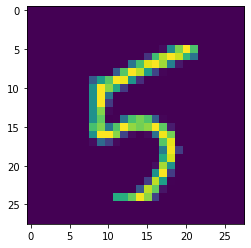

In [35]:
plt.imshow(x_train[0].reshape(28,28))